In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import linear_sum_assignment

%matplotlib inline

In [2]:
shared_resp_dir = '/home/sshankar/raiders/3mm/fastsrm/single_run/'
os.chdir(shared_resp_dir)

In [3]:
# Correlate runs 1 and 11 since they have the same input
r1 = np.load('shared_resp_run1_niter1000.npy')
r11 = np.load('shared_resp_run11_niter1000.npy')

# Same with runs 2 and 12
r2 = np.load('shared_resp_run2_niter1000.npy')
r12 = np.load('shared_resp_run12_niter1000.npy')

In [4]:
# Print the lengths of the different runs
# Useful for correlation
print(len(r1[0]), len(r2[0]), len(r11[0]), len(r12[0]))

374 297 375 314


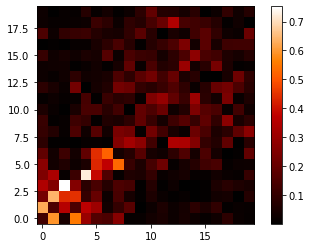

In [12]:
# Pair-wise correlate shared responses of runs 1 and 11
r1_11_pairwise = np.zeros((20,20))

for i in range(20):
    for j in range(20):
        r1_11_pairwise[i,j] = np.abs(np.corrcoef(r1[i], r11[j,0:-1])[0,1])
    
plt.imshow(r1_11_pairwise, cmap=plt.cm.gist_heat, origin='lower')
plt.colorbar()

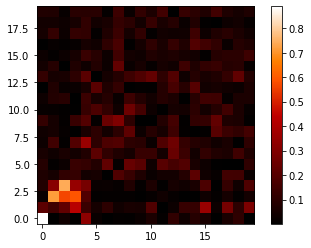

In [14]:
# Pair-wise correlate shared responses of runs 2 and 12
r2_12_pairwise = np.zeros((20,20))

for i in range(20):
    for j in range(20):
        r2_12_pairwise[i,j] = np.abs(np.corrcoef(r2[i], r12[j,0:-17])[0,1])
    
plt.imshow(r2_12_pairwise, cmap=plt.cm.gist_heat, origin='lower')
plt.colorbar()

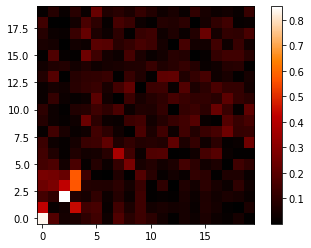

In [15]:
# Pair-wise correlate shared responses of runs 1 and 2
r1_2_pairwise = np.zeros((20,20))

for i in range(20):
    for j in range(20):
        r1_2_pairwise[i,j] = np.abs(np.corrcoef(r1[i,0:-77], r2[j])[0,1])
    
plt.imshow(r1_2_pairwise, cmap=plt.cm.gist_heat, origin='lower')
plt.colorbar()

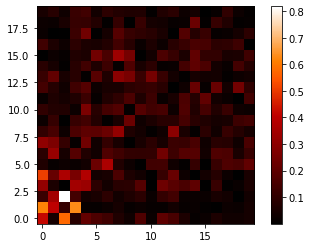

In [16]:
# Pair-wise correlate shared responses of runs 11 and 12
r11_12_pairwise = np.zeros((20,20))

for i in range(20):
    for j in range(20):
        r11_12_pairwise[i,j] = np.abs(np.corrcoef(r11[i,0:-61], r12[j])[0,1])
    
plt.imshow(r11_12_pairwise, cmap=plt.cm.gist_heat, origin='lower')
plt.colorbar()

In [43]:
# Apply the Hungarian algorithm to match components:
# Runs 1 and 11
rind, cind_1_11 = linear_sum_assignment(1-r1_11_pairwise)

# Runs 2 and 12
rind, cind_2_12 = linear_sum_assignment(1-r2_12_pairwise)

# Runs 1 and 2
rind, cind_1_2 = linear_sum_assignment(1-r1_2_pairwise)

# Runs 11 and 12
rind, cind_11_12 = linear_sum_assignment(1-r11_12_pairwise)

In [44]:
# Print best matched components of run 11 for components of run 1
print('Run1\tRun11\tCorrCoef')
for i in range(20):
    print(i+1, '\t', cind_1_11[i]+1, '\t', np.round(r1_11_pairwise[i,cind_1_11[i]],decimals=2))

Run1	Run11	CorrCoef
1 	 4 	 0.55
2 	 1 	 0.63
3 	 2 	 0.64
4 	 3 	 0.75
5 	 5 	 0.72
6 	 8 	 0.53
7 	 7 	 0.52
8 	 9 	 0.32
9 	 20 	 0.28
10 	 18 	 0.27
11 	 6 	 0.14
12 	 12 	 0.29
13 	 17 	 0.2
14 	 19 	 0.22
15 	 14 	 0.31
16 	 15 	 0.28
17 	 16 	 0.18
18 	 10 	 0.17
19 	 13 	 0.34
20 	 11 	 0.19


In [50]:
# Print best matched components of run 12 for components of run 2
print('Run2\tRun12\tCorrCoef')
for i in range(20):
    print(i+1, '\t', cind_2_12[i]+1, '\t', np.round(r2_12_pairwise[i,cind_2_12[i]],decimals=2))

Run2	Run12	CorrCoef
1 	 1 	 0.89
2 	 4 	 0.43
3 	 2 	 0.72
4 	 3 	 0.74
5 	 18 	 0.16
6 	 7 	 0.22
7 	 13 	 0.24
8 	 5 	 0.36
9 	 17 	 0.2
10 	 8 	 0.3
11 	 9 	 0.26
12 	 16 	 0.15
13 	 6 	 0.21
14 	 19 	 0.22
15 	 14 	 0.14
16 	 20 	 0.15
17 	 15 	 0.19
18 	 10 	 0.11
19 	 11 	 0.13
20 	 12 	 0.16


In [49]:
# Print best matched components of run 2 for components of run 1
print('Run1\tRun2\tCorrcoef')
for i in range(20):
    print(i+1, '\t', cind_1_2[i]+1, '\t', np.round(r1_2_pairwise[i,cind_1_2[i]],decimals=2))

Run1	Run2	Corrcoef
1 	 1 	 0.84
2 	 10 	 0.14
3 	 3 	 0.85
4 	 2 	 0.28
5 	 4 	 0.58
6 	 9 	 0.27
7 	 8 	 0.37
8 	 20 	 0.25
9 	 18 	 0.25
10 	 15 	 0.19
11 	 17 	 0.23
12 	 13 	 0.15
13 	 14 	 0.18
14 	 12 	 0.21
15 	 11 	 0.13
16 	 19 	 0.14
17 	 7 	 0.19
18 	 16 	 0.24
19 	 5 	 0.16
20 	 6 	 0.23


In [51]:
# Print best matched components of run 12 for components of run 11
print('Run11\tRun12\tCorrcoef')
for i in range(20):
    print(i+1, '\t', cind_11_12[i]+1, '\t', np.round(r11_12_pairwise[i,cind_11_12[i]],decimals=2))

Run11	Run12	Corrcoef
1 	 6 	 0.16
2 	 4 	 0.63
3 	 3 	 0.82
4 	 5 	 0.33
5 	 1 	 0.51
6 	 7 	 0.37
7 	 12 	 0.24
8 	 2 	 0.27
9 	 13 	 0.3
10 	 9 	 0.23
11 	 10 	 0.18
12 	 20 	 0.14
13 	 17 	 0.22
14 	 11 	 0.25
15 	 19 	 0.15
16 	 8 	 0.34
17 	 16 	 0.15
18 	 14 	 0.18
19 	 15 	 0.23
20 	 18 	 0.1


In [102]:
# Sort the correlation coefficients in descending order and 
# extract corresponding array indices
r1_11_sortidx = np.fliplr(np.argsort(r1_11_pairwise[[range(20)],[cind_1_11]]))[0]
r2_12_sortidx = np.fliplr(np.argsort(r2_12_pairwise[[range(20)],[cind_2_12]]))[0]
r1_2_sortidx = np.fliplr(np.argsort(r1_2_pairwise[[range(20)],[cind_1_2]]))[0]
r11_12_sortidx = np.fliplr(np.argsort(r11_12_pairwise[[range(20)],[cind_11_12]]))[0]

In [104]:
# Print sorted best matched components of run 11 for components of run 1
print('Run1\tRun11\tCorrCoef')
for i in range(20):
    print(r1_11_sortidx[i]+1, '\t', cind_1_11[r1_11_sortidx[i]]+1, '\t', \
          np.round(r1_11_pairwise[r1_11_sortidx[i],cind_1_11[r1_11_sortidx[i]]],decimals=2))

Run1	Run11	CorrCoef
4 	 3 	 0.75
5 	 5 	 0.72
3 	 2 	 0.64
2 	 1 	 0.63
1 	 4 	 0.55
6 	 8 	 0.53
7 	 7 	 0.52
19 	 13 	 0.34
8 	 9 	 0.32
15 	 14 	 0.31
12 	 12 	 0.29
16 	 15 	 0.28
9 	 20 	 0.28
10 	 18 	 0.27
14 	 19 	 0.22
13 	 17 	 0.2
20 	 11 	 0.19
17 	 16 	 0.18
18 	 10 	 0.17
11 	 6 	 0.14


In [120]:
# Print sorted best matched components of run 12 for components of run 2
print('Run2\tRun12\tCorrCoef')
for i in range(20):
    print(r2_12_sortidx[i]+1, '\t', cind_2_12[r2_12_sortidx[i]]+1, '\t', \
          np.round(r2_12_pairwise[r2_12_sortidx[i],cind_2_12[r2_12_sortidx[i]]],decimals=2))

Run2	Run12	CorrCoef
1 	 1 	 0.89
4 	 3 	 0.74
3 	 2 	 0.72
2 	 4 	 0.43
8 	 5 	 0.36
10 	 8 	 0.3
11 	 9 	 0.26
7 	 13 	 0.24
6 	 7 	 0.22
14 	 19 	 0.22
13 	 6 	 0.21
9 	 17 	 0.2
17 	 15 	 0.19
20 	 12 	 0.16
5 	 18 	 0.16
12 	 16 	 0.15
16 	 20 	 0.15
15 	 14 	 0.14
19 	 11 	 0.13
18 	 10 	 0.11


In [119]:
# Print best matched components of run 2 for components of run 1
print('Run1\tRun2\tCorrCoef')
for i in range(20):
    print(r1_2_sortidx[i]+1, '\t', cind_1_2[r1_2_sortidx[i]]+1, '\t', \
          np.round(r1_2_pairwise[r1_2_sortidx[i],cind_1_2[r1_2_sortidx[i]]],decimals=2))

Run1	Run2	CorrCoef
3 	 3 	 0.85
1 	 1 	 0.84
5 	 4 	 0.58
7 	 8 	 0.37
4 	 2 	 0.28
6 	 9 	 0.27
8 	 20 	 0.25
9 	 18 	 0.25
18 	 16 	 0.24
20 	 6 	 0.23
11 	 17 	 0.23
14 	 12 	 0.21
17 	 7 	 0.19
10 	 15 	 0.19
13 	 14 	 0.18
19 	 5 	 0.16
12 	 13 	 0.15
16 	 19 	 0.14
2 	 10 	 0.14
15 	 11 	 0.13


In [118]:
# Print best matched components of run 12 for components of run 11
print('Run11\tRun12\tCorrCoef')
for i in range(20):
    print(r11_12_sortidx[i]+1, '\t', cind_11_12[r11_12_sortidx[i]]+1, '\t', \
          np.round(r11_12_pairwise[r11_12_sortidx[i],cind_11_12[r11_12_sortidx[i]]],decimals=2))

Run11	Run12	CorrCoef
3 	 3 	 0.82
2 	 4 	 0.63
5 	 1 	 0.51
6 	 7 	 0.37
16 	 8 	 0.34
4 	 5 	 0.33
9 	 13 	 0.3
8 	 2 	 0.27
14 	 11 	 0.25
7 	 12 	 0.24
19 	 15 	 0.23
10 	 9 	 0.23
13 	 17 	 0.22
11 	 10 	 0.18
18 	 14 	 0.18
1 	 6 	 0.16
17 	 16 	 0.15
15 	 19 	 0.15
12 	 20 	 0.14
20 	 18 	 0.1


In [111]:
# Calculate singular values of correlation matrices
u_1_11, s_1_11, vh_1_11 = np.linalg.svd(r1_11_pairwise)
u_2_12, s_2_12, vh_2_12 = np.linalg.svd(r2_12_pairwise)
u_1_2, s_1_2, vh_1_2 = np.linalg.svd(r1_2_pairwise)
u_11_12, s_11_12, vh_11_12 = np.linalg.svd(r11_12_pairwise)

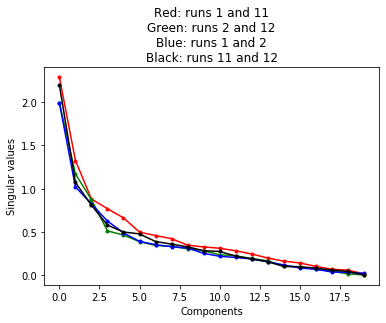

In [115]:
# Plot the singular values
plt.plot(s_1_11,'r.-')
plt.plot(s_2_12,'g.-')
plt.plot(s_1_2,'b.-')
plt.plot(s_11_12,'k.-')
plt.title('Red: runs 1 and 11\nGreen: runs 2 and 12\nBlue: runs 1 and 2\nBlack: runs 11 and 12')
plt.xlabel('Components')
plt.ylabel('Singular values');